## What factors contribute to lower rates of adolescent maternal mortality long-term?

Machine learning methods are becoming increasingly relevant as data becomes more readily available. These methods enable researchers to expand on their general understanding of the complex dynamic changes in indicators with a significant number of interrelated factors. Additionally, it is possible to make the results, like external factors affecting the incidence of adolescent maternal mortality, interpretable from a clinical point of view.

The following methods consist of: Random Forest Classifier, KNeighbors Classifier, Logistic Regression, and Gaussian Naive Bayes.  For the interpretation of differences between individual parameters of the mothers in two classes predicted failure (maternal mortality) verses prediction success (maternal vitality), the problem of classification via using the decision tree can be solved. The target is prediction failure class.

**The primary purpose of this study was to assess the rates of adolescent maternal mortality within Mexico, and calculate the risk probability of an adolescent maternal mortality by region in Mexico based on some of the top features contributing to maternal mortality. **

------------------------------------------------------------------------------------------

Linear Regression - Predict Maternal Mortality based off these factors (continuous):

**PEARSON CORRELATION** Determine which factors are more highly correlated. 

target - 
features -


2010 version and 2015 version 
- what states improved
- principle component analysis of each

In [358]:
# Import the relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

# Machine Learning modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# ROC Curve
from sklearn.metrics import roc_curve

In [129]:
# Open merged materna_mortal_factors dataset
%store -r metro_gdp_mortality

In [130]:
data = metro_gdp_mortality
data.head(10)

,State,State Population 2015,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,μ Age Maternal Mortality,μ Age Variance,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Age Adolescent Maternal Mortality,Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality,Proportion Ado(n):Total(n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
0,Aguascalientes,1044049,19528.0,0,28.36,55.16,0,18.08,0,0.1969,0,4.56,0.16
1,Baja California,3315766,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
4,Baja California Sur,272711,21431.0,0,27.56,55.37,1,18.00,0,0.2424,0,4.83,0.16
5,Campeche,283025,NaN,1,26.87,44.29,1,18.00,0,0.1746,0,4.12,0.14
6,Chiapas,1162592,13392.0,1,28.02,45.02,1,18.33,0,0.1677,1,4.75,0.12
8,Chihuahua,2309519,36202.0,0,27.59,40.12,1,17.88,1,0.1633,1,4.61,0.13
10,Coahuila de Zaragoza,2629584,68995.0,0,28.24,61.58,1,17.92,1,0.2162,0,2.82,0.14
13,Colima,359392,16240.0,1,26.98,55.14,1,17.68,1,0.2484,0,3.34,0.15
14,Durango,654876,13849.0,0,28.65,57.71,0,17.93,1,0.1749,0,3.96,0.17
15,Guanajuato,2499860,28856.0,0,29.19,54.33,0,17.92,1,0.1358,1,3.87,0.15


### Dataset Target Variable: Above(0)/Not(1) Mexico μ Age Maternal Mortality

### Visualize Data

#### Assess potential correlation of various factors within each Region
- Create a correlation dataframe
- Plot the correlation dataframe on a sns heatmap:
    - Cells that are in green show positive correlation
    - Cells that are in red show negative correlation

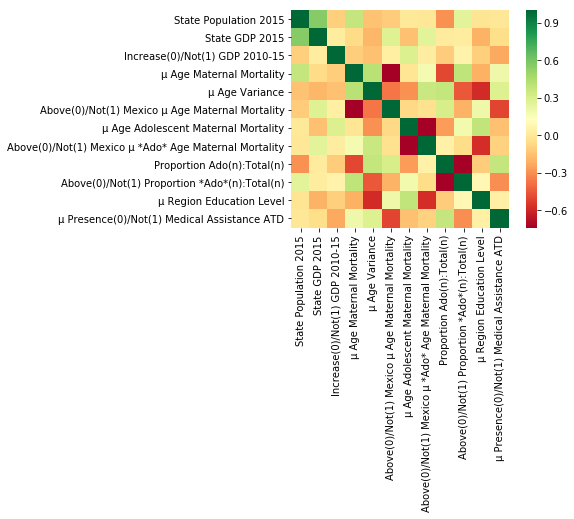

In [131]:
# Create a correlation dataframe
feature_corr = data.corr()

# Plot a correlation heatmap
sns.heatmap(feature_corr, square=True, cmap='RdYlGn')

In [332]:
data.head()

,State,State Population 2015,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,μ Age Maternal Mortality,μ Age Variance,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Age Adolescent Maternal Mortality,Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality,Proportion Ado(n):Total(n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
0,0,1044049,19528.0,0,28.36,55.16,0,18.08,0,0.1969,0,4.56,0.16
1,1,3315766,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
4,2,272711,21431.0,0,27.56,55.37,1,18.00,0,0.2424,0,4.83,0.16
5,3,283025,22120.5,1,26.87,44.29,1,18.00,0,0.1746,0,4.12,0.14
6,4,1162592,13392.0,1,28.02,45.02,1,18.33,0,0.1677,1,4.75,0.12


#### *Preliminary Observations of Interest*: 
- **Positive (+) Correlation** *(as 'X' increases, so does 'Y')*
    - State Population
        - State GDP
        - μ Age Maternal Mortality
        - Above(0)/Not(1) Proportion *Ado*(n):Total(n)
    - State GDP
        - State Population
        - Above(0)/Below(1) μ Pop Age
        - Above(0)/Not(1) Proportion *Ado*(n):Total(n)
    - μ Age Adolescent Maternal Mortality
        - Increase(0)/Not(1) State GDP 2010-15
- **Negative (-) Correlation** *(as 'X' increases, 'Y' decreases)*
    - μ Region Education Level
        - μ Age Variance
        - Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality

#### ( + ) Correlation: State GDP and μ Age Maternal Mortality

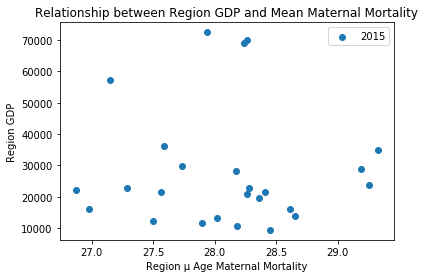

In [330]:
plt.scatter(data['μ Age Maternal Mortality'], data['State GDP 2015'], label='2015')
plt.xlabel("Region μ Age Maternal Mortality")
plt.ylabel("Region GDP")
plt.title("Relationship between Region GDP and Mean Maternal Mortality")
plt.legend()

#### ( + ) Correlation: State GDP ad Region Above(0)/Not(1) Population Proportion Ado(n):Total(n)

No handles with labels found to put in legend.


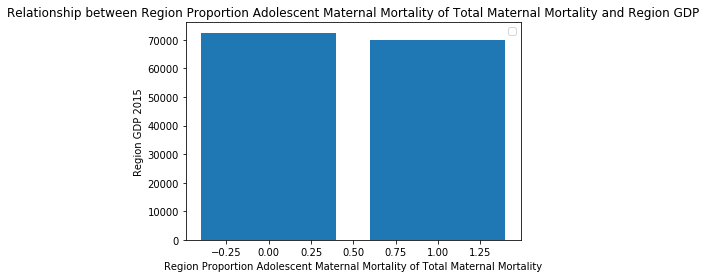

In [336]:
plt.bar(data['Above(0)/Not(1) Proportion *Ado*(n):Total(n)'], data['State GDP 2015'])
plt.xlabel("Region Proportion Adolescent Maternal Mortality of Total Maternal Mortality")
plt.ylabel("Region GDP 2015")
plt.title("Relationship between Region Proportion Adolescent Maternal Mortality of Total Maternal Mortality and Region GDP")
plt.legend()

#### ( + ) Correlation: Above(0)/Below(1) μ Age of Maternal Mortality in Mexico with State GDP

Text(0.5,1,'Relationship between μ Age of Maternal Mortality and State GDP')

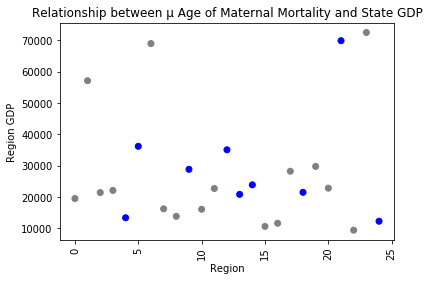

In [337]:
fig, ax = plt.subplots()

#define dot colors
cols = {0: 'grey', 1: 'blue'}
labels = ['Above Country μ', 'Below Country μ']

plt.scatter(x=data['State'], 
            y=data['State GDP 2015'], 
            c=data['Above(0)/Not(1) Proportion *Ado*(n):Total(n)'].map(cols))

# label axes and title
plt.xlabel("Region")
plt.xticks(rotation='vertical')
plt.ylabel("Region GDP")
plt.title("Relationship between μ Age of Maternal Mortality and State GDP")

#### Purpose for Changing all Categorical Strings to a Numeric Value: 
- Machine Learning models will ignore string values (strings have no statistical value unless added)
- Numeric values are comparable therefore string values should be categorically changed to numbers
- This is how you compare a string value to a numeric value that the model can use

In [133]:
# Convert Column value strings to a numeric value
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [134]:
data.head()

,State,State Population 2015,State GDP 2015,Increase(0)/Not(1) GDP 2010-15,μ Age Maternal Mortality,μ Age Variance,Above(0)/Not(1) Mexico μ Age Maternal Mortality,μ Age Adolescent Maternal Mortality,Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality,Proportion Ado(n):Total(n),Above(0)/Not(1) Proportion *Ado*(n):Total(n),μ Region Education Level,μ Presence(0)/Not(1) Medical Assistance ATD
0,0,1044049,19528.0,0,28.36,55.16,0,18.08,0,0.1969,0,4.56,0.16
1,1,3315766,57136.0,0,27.15,46.31,1,18.00,0,0.1911,0,4.42,0.16
4,2,272711,21431.0,0,27.56,55.37,1,18.00,0,0.2424,0,4.83,0.16
5,3,283025,22120.5,1,26.87,44.29,1,18.00,0,0.1746,0,4.12,0.14
6,4,1162592,13392.0,1,28.02,45.02,1,18.33,0,0.1677,1,4.75,0.12


## Basic Logistic Regression:

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

#### Test-Train-Split:
- X = copy of all features and the response variable of dataset
- y = all features within dataset *excluding the response (target) variable*
- test_size = represents the proportion of the dataset (as a percentage) to include in the test split
- random_state = the seed used by the random number generator

In [287]:
# Entire dataset (even with response variable)
X = data.copy()

# The response variable
y = data.copy().pop('Above(0)/Not(1) Mexico μ Age Maternal Mortality')

In [304]:
# Create train and test data sets with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=10)
len(X_train), len(X_test), len(y_train), len(y_test)

(17, 8, 17, 8)

#### Logistic Regression
- Round One

In [305]:
# Create a Logistic Regression Incidence 
clf_log = LogisticRegression()

# Fit clf_log to training data
clf_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [306]:
# Examine the coefficients
list(np.transpose(clf_log.coef_))

[array([3.18898225e-08]),
 array([-3.16569954e-07]),
 array([5.12197006e-05]),
 array([1.94852658e-09]),
 array([-1.0003266e-08]),
 array([-4.74233324e-08]),
 array([9.9734472e-09]),
 array([-1.49978067e-09]),
 array([-1.47227365e-09]),
 array([-8.63080476e-12]),
 array([-7.43673972e-10]),
 array([2.46236078e-09]),
 array([-3.73162997e-10])]

In [307]:
# Calculate the class probablity
probability = clf_log.predict_proba(X_test)
probability

array([[0.2454313 , 0.7545687 ],
       [0.1327552 , 0.8672448 ],
       [0.33279978, 0.66720022],
       [0.26671487, 0.73328513],
       [0.47121328, 0.52878672],
       [0.25349478, 0.74650522],
       [0.31820637, 0.68179363],
       [0.32782637, 0.67217363]])

In [308]:
# Predict the model
predict = clf_log.predict(X_test)

# Compute classification report
class_report = classification_report(y_test, predict)
print(class_report)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.75      1.00      0.86         6

avg / total       0.56      0.75      0.64         8



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[0 2]
 [0 6]]


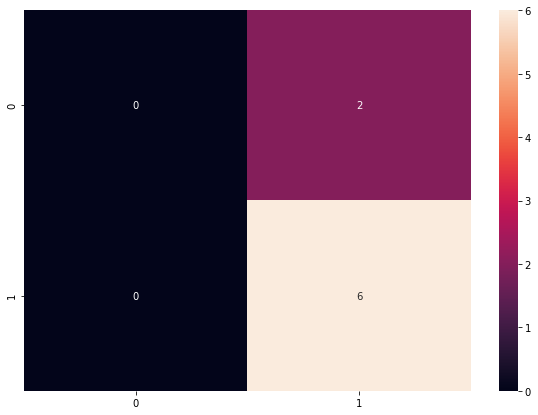

In [309]:
# Compute the confusion_matrix to evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, predict)
print(conf_matrix)

# Plot confusion_matrix
plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot=True)

In [310]:
# Print the accuracy from the testing data
accuracy_score(y_test, predict)

0.75

In [357]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf_log.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf_log, X, y, scoring='roc_auc', cv=5)

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8333333333333333
AUC scores computed using 5-fold cross-validation: [0.75       1.         0.5        0.66666667 1.        ]


#### Logistic Regression
- Test Accuracy of Model with ROC

Text(0.5,1,'ROC Curve')

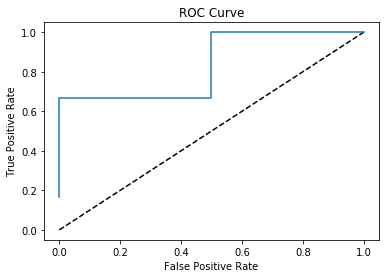

In [351]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf_log.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### Tuning the Model

The f1-score in *class_report* represents the classifier model's accuracy in classifying the data points in that particular class compared to all other class. Since the resulting f1-score and accuracy score is ~75%, this is verification that the model is working. However, adding  **hyperparameters ('C')**, to the logistic regression instance may increase the accuracy of the model. 

#### Find Optimal 'C' Hyperparameter Value with GridSearchCV

In [356]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.68


In [354]:
# calculate best 'C' with GridSearchCV
def cv_optimize(clf, parameters, X_train, y_train, n_folds=5):
    
    #Use GridSearchCV to find the best C parameter
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X_train, y_train)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [355]:
#Define possible parameter 'C' range of values
parameters = {"C": [100000, 10000, 1000, 100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]}

#Apply cv_optimize function to Logistic Regression
clf = cv_optimize(clf_log, parameters, X_train, y_train)
    
#Fit to training data
clf = clf.fit(X_train, y_train)
    
#Assess model accuracy (train and test)
training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Accuracy on training data: {:0.4f}".format(training_accuracy))
print("Accuracy on test data:     {:0.4f}".format(test_accuracy))

BEST PARAMS {'C': 100000}
Accuracy on training data: 0.5294
Accuracy on test data:     0.7500


#### Test Accuracy of New Model with ROC

Text(0.5,1,'ROC Curve')

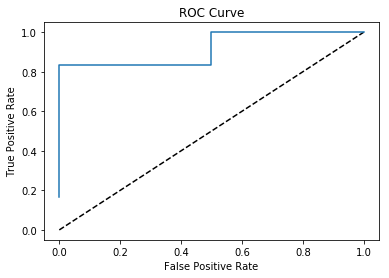

In [359]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

### Create Maternal Mortality Strategy Using The Model

In [360]:
data.columns

Index(['State', 'State Population 2015', 'State GDP 2015',
       'Increase(0)/Not(1) GDP 2010-15', 'μ Age Maternal Mortality',
       'μ Age Variance', 'Above(0)/Not(1) Mexico μ Age Maternal Mortality',
       'μ Age Adolescent Maternal Mortality',
       'Above(0)/Not(1) Mexico μ *Ado* Age Maternal Mortality',
       'Proportion Ado(n):Total(n)',
       'Above(0)/Not(1) Proportion *Ado*(n):Total(n)',
       'μ Region Education Level',
       'μ Presence(0)/Not(1) Medical Assistance ATD'],
      dtype='object')

### It can be observed that the Logistic Regression model in Python predicts the classes with an accuracy of approximately ~68% with added Hyperparameters and 5-fold Cross Validation. Additionally, generates reasonably good predictions.